#### La implementación fue realizada en google Colaboratory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data collection

In [3]:
import os
import sys

#### Datasets
- PubFig83 + LFW :  http://www.briancbecker.com/blog/research/pubfig83-lfw-dataset/

In [4]:
fivepath = './drive/My Drive/datasets/fiveCeleb/'
pubfpath = './drive/My Drive/datasets/pubfig_raw/'

five_train_path = fivepath + 'train/'
five_val_path = fivepath + 'val/'
pubf_train_path = pubfpath + 'train/'
pubf_test_path = pubfpath + 'test/'

In [5]:
train_P = pubf_train_path
test_P = pubf_test_path

In [6]:
all_classes = os.listdir(train_P)
m = 12 # modulo de clases
if len(all_classes) < 10:
  m = 1

classes = []
for i,n in enumerate(all_classes):
  if 'Juanpablo' in n:
    yo = i
    classes.append(n)
  elif 'Julio' in n:
    ju = i
    classes.append(n)
  elif i % m == 0:
    classes.append(n)

print(yo,all_classes[yo],',',ju,all_classes[ju])
num_classes = len(classes)
print('N clases:',num_classes)

83 Juanpablo Heredia , 84 Julio Santisteban
N clases: 9


In [7]:
print(len(classes), classes)

9 ['Uma Thurman', 'Reese Witherspoon', 'Michael Bloomberg', 'Katherine Heigl', 'Harrison Ford', 'Clive Owen', 'Cameron Diaz', 'Juanpablo Heredia', 'Julio Santisteban']


### train & val sets

In [8]:
import cv2
from skimage.io import imread
import numpy as np

In [9]:
train_imgs = []
train_lbls = []

for i, person in enumerate(classes):
  cur_path = train_P + person +'/'
  imgs_dir = os.listdir(cur_path)
  for j, img_path in enumerate(imgs_dir):
    if j > 12:
      break
    img = cv2.imread(cur_path + img_path, cv2.IMREAD_GRAYSCALE)
    train_imgs.append(img)
    train_lbls.append(i)

  if i % 2 == 0:
    print(cur_path)

./drive/My Drive/datasets/pubfig_raw/train/Uma Thurman/
./drive/My Drive/datasets/pubfig_raw/train/Michael Bloomberg/
./drive/My Drive/datasets/pubfig_raw/train/Harrison Ford/
./drive/My Drive/datasets/pubfig_raw/train/Cameron Diaz/
./drive/My Drive/datasets/pubfig_raw/train/Julio Santisteban/


In [10]:
len(train_imgs)

109

In [11]:
test_imgs = []
test_lbls = []

for i, person in enumerate(classes):
  cur_path = test_P + person +'/'
  imgs_dir = os.listdir(cur_path)
  for j, img_path in enumerate(imgs_dir):
    if j > 6:
      break
    img = cv2.imread(cur_path + img_path, cv2.IMREAD_GRAYSCALE)
    test_imgs.append(img)
    test_lbls.append(i)
  if i % 5 == 0:
    print(cur_path)

./drive/My Drive/datasets/pubfig_raw/test/Uma Thurman/
./drive/My Drive/datasets/pubfig_raw/test/Clive Owen/


In [12]:
import torch

In [13]:
train_x = np.array(train_imgs)
train_y = np.array(train_lbls)
print (train_x.shape, train_y.shape)

train_x = train_x.reshape(train_x.shape[0], 1,
                          train_x.shape[1], train_x.shape[2])

train_x = torch.from_numpy(train_x)
train_y = torch.from_numpy(train_y)

train_x.shape, train_y.shape

(109, 100, 100) (109,)


(torch.Size([109, 1, 100, 100]), torch.Size([109]))

In [14]:
test_x = np.array(test_imgs)
test_y = np.array(test_lbls)
print (test_x.shape, test_y.shape)

test_x = test_x.reshape(test_x.shape[0], 1,
                        test_x.shape[1], test_x.shape[2])

test_x = torch.from_numpy(test_x)
test_y = torch.from_numpy(test_y)

test_x.shape, test_y.shape

(55, 100, 100) (55,)


(torch.Size([55, 1, 100, 100]), torch.Size([55]))

## CNN

In [15]:
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [16]:
num_classes = len(classes)

In [17]:
class Net3(nn.Module):
  def __init__(self):
    super(Net3, self).__init__()
    self.cnn_layers = nn.Sequential(
        nn.Conv2d(1,4,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),
        
        nn.Conv2d(4,4,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),
    
        nn.Conv2d(4,16,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(inplace=True),
        nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2))
    
    self.linear_layers = nn.Sequential(
        nn.Linear(2304,num_classes))
      
  def forward(self, x):
    x = self.cnn_layers(x)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

In [18]:
class Net2(nn.Module):
  def __init__(self):
    super(Net2, self).__init__()
    self.cnn_layers = nn.Sequential(
      nn.Conv2d(1,16,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2,stride=2),
      
      nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2,stride=2))
          
    self.linear_layers = nn.Sequential(
      nn.Linear(4608,num_classes))

  def forward(self, x):
    x = self.cnn_layers(x)
    x = x.view(x.size(0), -1)
    x = self.linear_layers(x)
    return x

La implementación de las redes Net2 y Net3 es inspirada por la implementacion explicada en 
https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/

In [19]:
# del model
model = Net3()
opt = Adam(model.parameters(), lr=0.07)
criterion = nn.CrossEntropyLoss()

print(model)

if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

Net3(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
   

### Training

In [20]:
train_x = train_x.float()
train_y = train_y.float()
test_x = test_x.float()
test_y = test_y.float()

In [22]:
x_train, y_train = Variable(train_x), Variable(train_y)

if torch.cuda.is_available:
  x_train = x_train.cuda()
  y_train = y_train.cuda()

In [23]:
E = 40
e = E//10
losses_t = []

for epoch in range(E):
    model.train()
    
    opt.zero_grad()
    output_t = model(x_train)
        
    loss_t = criterion(output_t, y_train.long())
    losses_t.append(loss_t)
    
    loss_t.backward()
    opt.step()

    if epoch % e == 0:
      print ('Epoch',epoch+1,'\t','loss:',loss_t)

Epoch 1 	 loss: tensor(2.2222, grad_fn=<NllLossBackward>)
Epoch 5 	 loss: tensor(2.1845, grad_fn=<NllLossBackward>)
Epoch 9 	 loss: tensor(2.1313, grad_fn=<NllLossBackward>)
Epoch 13 	 loss: tensor(1.8235, grad_fn=<NllLossBackward>)
Epoch 17 	 loss: tensor(1.0480, grad_fn=<NllLossBackward>)
Epoch 21 	 loss: tensor(0.2826, grad_fn=<NllLossBackward>)
Epoch 25 	 loss: tensor(0.0495, grad_fn=<NllLossBackward>)
Epoch 29 	 loss: tensor(0.0066, grad_fn=<NllLossBackward>)
Epoch 33 	 loss: tensor(0.0012, grad_fn=<NllLossBackward>)
Epoch 37 	 loss: tensor(0.0004, grad_fn=<NllLossBackward>)


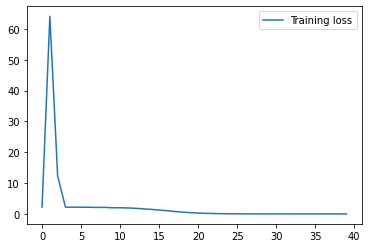

In [24]:
plt.plot(losses_t, label='Training loss')
plt.legend()
plt.show()

### validation

In [25]:
from sklearn.metrics import accuracy_score

In [27]:
with torch.no_grad():
    output = model(train_x)#model(train_x.cuda())#model(train_x)#
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

print('train acc:',accuracy_score(train_y, predictions))
# print(train_y)
# print(predictions)

train acc: 1.0


In [30]:
with torch.no_grad():
    output = model(test_x)#model(test_x.cuda())#

print(output.shape)
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# print(test_y)
# print(predictions)
print('val acc:', accuracy_score(test_y, predictions))

torch.Size([55, 9])
val acc: 0.2545454545454545


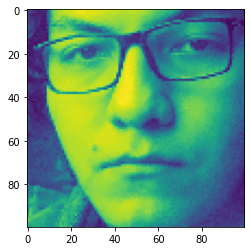

In [31]:
img = cv2.imread('IMG_2963.jpeg',cv2.IMREAD_GRAYSCALE)
# print (img.shape)

plt.imshow(img)

t_image = img.reshape(1,1, img.shape[0], img.shape[1])
t_image  = torch.from_numpy(t_image)
t_image = t_image.float()

In [32]:
with torch.no_grad():
  if torch.cuda.is_available():
    y_pred = model(t_image.cuda())
    softmax = torch.exp(y_pred).cpu()
  else:
    y_pred = model(t_image)
    softmax = torch.exp(y_pred)

softmax = softmax.detach()

prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

print('Identidad:',classes[predictions[0]])

Identidad: Juanpablo Heredia


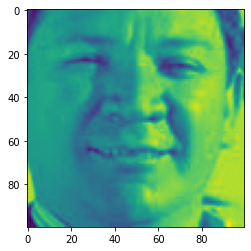

In [33]:
img = cv2.imread('descarga (2).jpg',cv2.IMREAD_GRAYSCALE)
# print (img.shape)

plt.imshow(img)

t_image = img.reshape(1,1, img.shape[0], img.shape[1])
t_image  = torch.from_numpy(t_image)
t_image = t_image.float()

In [34]:
with torch.no_grad():
  if torch.cuda.is_available():
    y_pred = model(t_image.cuda())
    softmax = torch.exp(y_pred).cpu()
  else:
    y_pred = model(t_image)
    softmax = torch.exp(y_pred)

softmax = softmax.detach()

prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

print('Identidad:',classes[predictions[0]])

Identidad: Julio Santisteban
